In [ ]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [ ]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt

In [ ]:
# machine learning lib

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
# Reading data

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**1.Data understanding and Exploration**

In [ ]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
#Inspecting the data frame

# Check the number of rows and columns in the dataframe
bike.shape

(730, 16)

In [ ]:
# checking the size of dataframe
bike.size

11680

In [ ]:
# checking the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# checking the column wise information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Assigning string values to different seasons instead of numeric values

# 1- Spring
bike.loc[bike['season'] == 1, 'season'] = 'Spring'
# 2- Summer
bike.loc[bike['season'] == 2, 'season'] = 'Summer'
# 3- Fall
bike.loc[bike['season'] == 3, 'season'] = 'Fall'
# 4- Winter
bike.loc[bike['season'] == 4, 'season'] = 'Winter'

In [ ]:
# 1- Clear, few clouds, Partly Cloudy
bike.loc[bike['weathersit'] == 1, 'weathersit'] = 'A'
# 2- Mist, Cloudy
bike.loc[bike['weathersit'] == 2, 'weathersit'] = 'B'
# 3-Light Snow and rain
bike.loc[bike['weathersit'] == 3, 'weathersit'] = 'C'

In [ ]:
# checking datatypes
bike.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
# checking the numeric column
bike.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.995890,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.000339,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# checking unique values
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [ ]:
# Creating a copy of original dataframe for duplicate check

bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any

bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [ ]:
bike_dup.shape

(730, 16)

In [ ]:
bike.shape

(730, 16)

In [ ]:
#Create a copy of the  dataframe, without the 'instant' column,

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [ ]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



A    463
B    246
C     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28

In [ ]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [ ]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


*Creating Dummy Variables*

In [ ]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [ ]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [ ]:
bike_new

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,B,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,2,1,B,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,3,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,A,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,12,0,5,1,B,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,12,0,6,0,B,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,12,0,0,0,B,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,12,0,1,1,A,10.489153,11.58500,48.3333,23.500518,1796


In [ ]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [ ]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_Spring  730 non-null    uint8  
 9   season_Summer  730 non-null    uint8  
 10  season_Winter  730 non-null    uint8  
 11  mnth_2         730 non-null    uint8  
 12  mnth_3         730 non-null    uint8  
 13  mnth_4         730 non-null    uint8  
 14  mnth_5         730 non-null    uint8  
 15  mnth_6         730 non-null    uint8  
 16  mnth_7         730 non-null    uint8  
 17  mnth_8         730 non-null    uint8  
 18  mnth_9    

In [ ]:
bike_new.shape

(730, 30)

*SPLITTING THE DATA*

In [ ]:
# Check the shape before spliting

bike_new.shape

(730, 30)

In [ ]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_Spring  730 non-null    uint8  
 9   season_Summer  730 non-null    uint8  
 10  season_Winter  730 non-null    uint8  
 11  mnth_2         730 non-null    uint8  
 12  mnth_3         730 non-null    uint8  
 13  mnth_4         730 non-null    uint8  
 14  mnth_5         730 non-null    uint8  
 15  mnth_6         730 non-null    uint8  
 16  mnth_7         730 non-null    uint8  
 17  mnth_8         730 non-null    uint8  
 18  mnth_9    

In [ ]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [ ]:
#Verify the info and shape of the dataframes after split:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   atemp          510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   cnt            510 non-null    int64  
 8   season_Spring  510 non-null    uint8  
 9   season_Summer  510 non-null    uint8  
 10  season_Winter  510 non-null    uint8  
 11  mnth_2         510 non-null    uint8  
 12  mnth_3         510 non-null    uint8  
 13  mnth_4         510 non-null    uint8  
 14  mnth_5         510 non-null    uint8  
 15  mnth_6         510 non-null    uint8  
 16  mnth_7         510 non-null    uint8  
 17  mnth_8         510 non-null    uint8  
 18  mnth_9  

In [ ]:
df_train.shape

(510, 30)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   atemp          219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   cnt            219 non-null    int64  
 8   season_Spring  219 non-null    uint8  
 9   season_Summer  219 non-null    uint8  
 10  season_Winter  219 non-null    uint8  
 11  mnth_2         219 non-null    uint8  
 12  mnth_3         219 non-null    uint8  
 13  mnth_4         219 non-null    uint8  
 14  mnth_5         219 non-null    uint8  
 15  mnth_6         219 non-null    uint8  
 16  mnth_7         219 non-null    uint8  
 17  mnth_8         219 non-null    uint8  
 18  mnth_9   

In [ ]:
df_test.shape


(219, 30)

*EXPLORATORY DATA ANALYSIS*

In [ ]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_B', 'weathersit_C'],
      dtype='object')

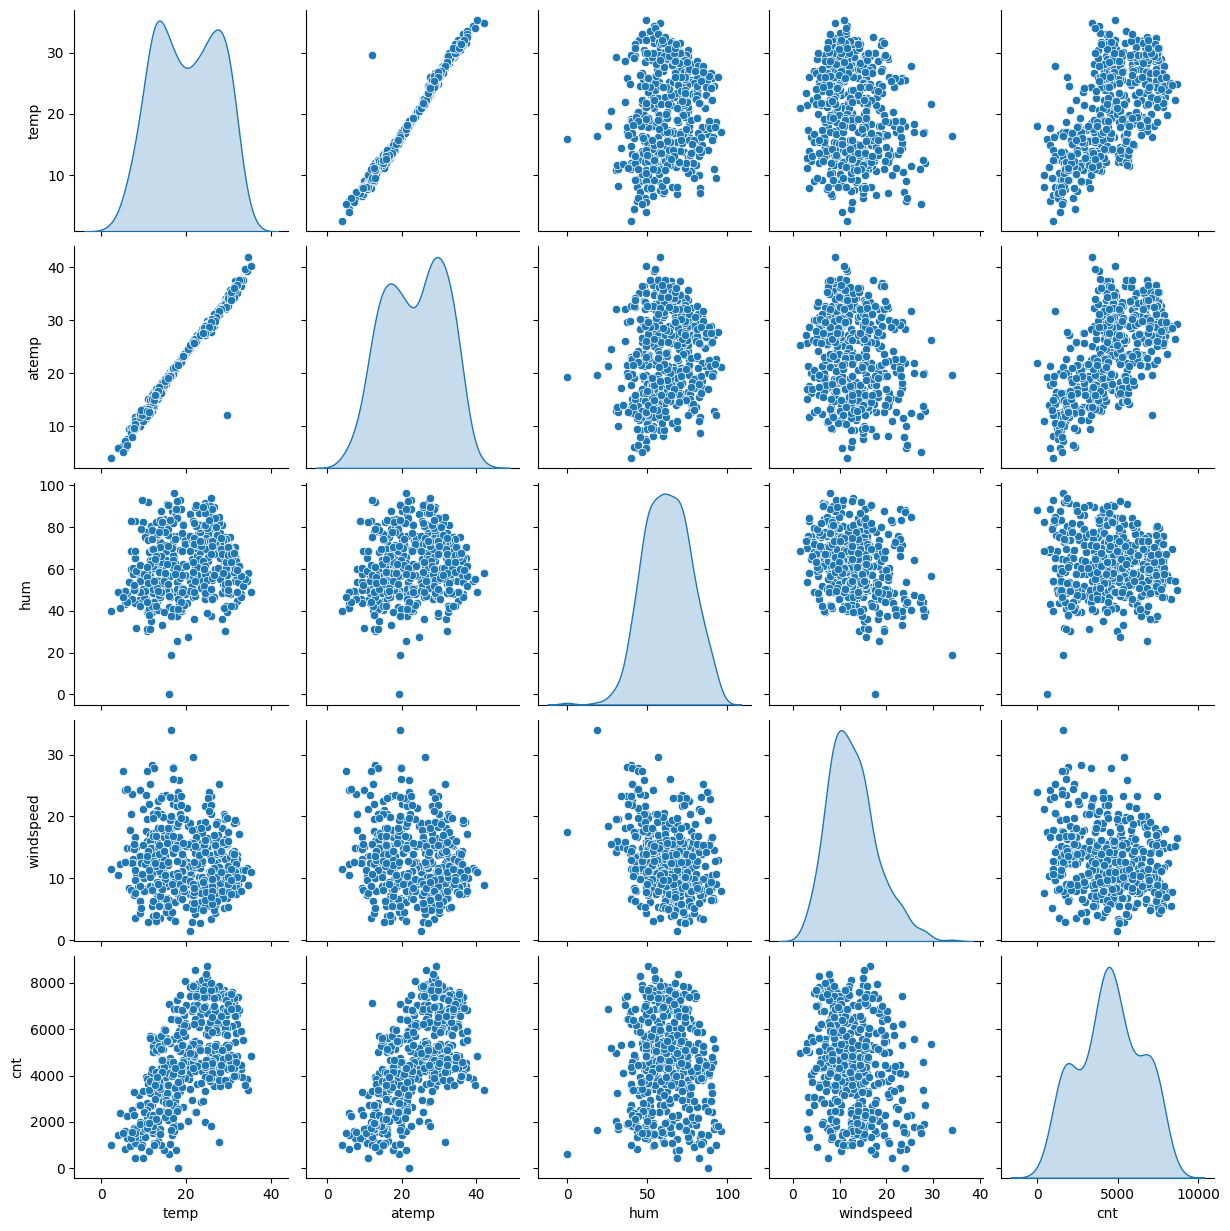

In [ ]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

**2.Data Visualisation**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   atemp          510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   cnt            510 non-null    int64  
 8   season_Spring  510 non-null    uint8  
 9   season_Summer  510 non-null    uint8  
 10  season_Winter  510 non-null    uint8  
 11  mnth_2         510 non-null    uint8  
 12  mnth_3         510 non-null    uint8  
 13  mnth_4         510 non-null    uint8  
 14  mnth_5         510 non-null    uint8  
 15  mnth_6         510 non-null    uint8  
 16  mnth_7         510 non-null    uint8  
 17  mnth_8         510 non-null    uint8  
 18  mnth_9  

<Axes: xlabel='temp', ylabel='Density'>

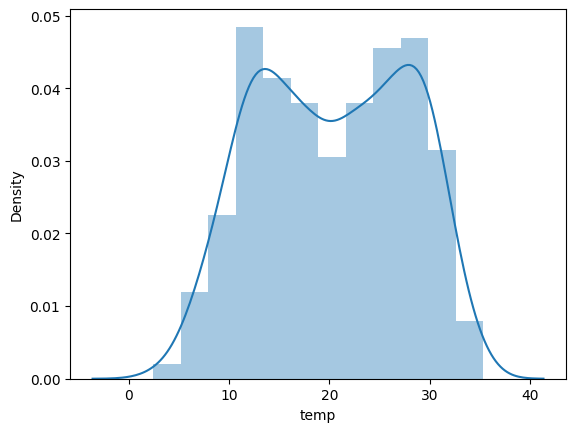

In [ ]:
#Temperature
sns.distplot(bike['temp'])

<Axes: xlabel='atemp', ylabel='Density'>

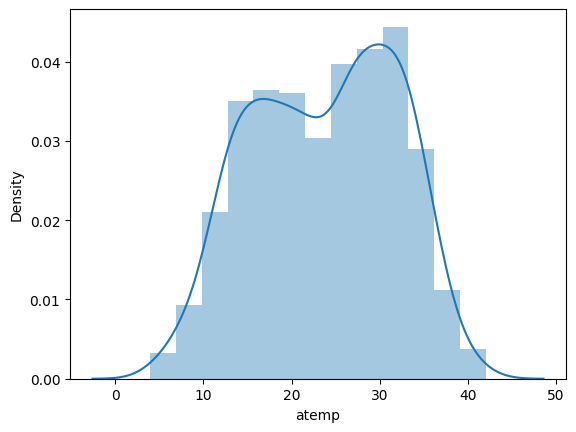

In [ ]:
#Actual Temperature
sns.distplot(bike['atemp'])

<Axes: xlabel='windspeed', ylabel='Density'>

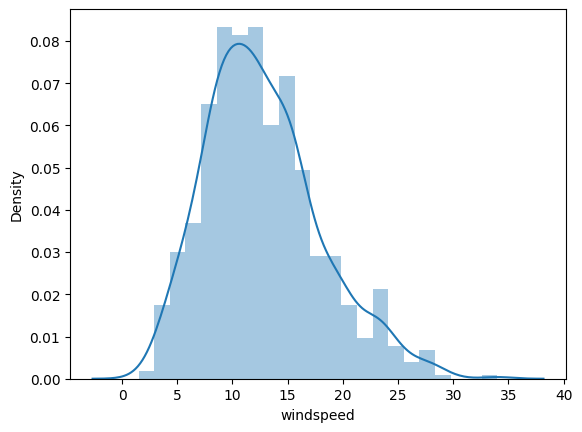

In [ ]:
#Wind speed
sns.distplot(bike['windspeed'])

<Axes: xlabel='cnt', ylabel='Density'>

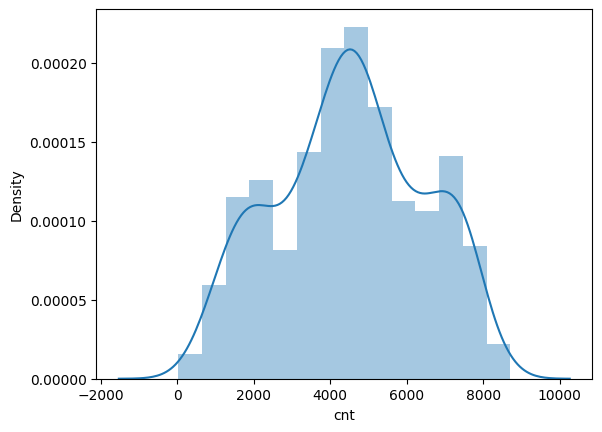

In [ ]:
#Target variable: count of total rental bikes including both casual and registered
sns.distplot(bike['cnt'])

In [ ]:
bike_numeric = bike.select_dtypes(include=['float64'])
bike_numeric.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


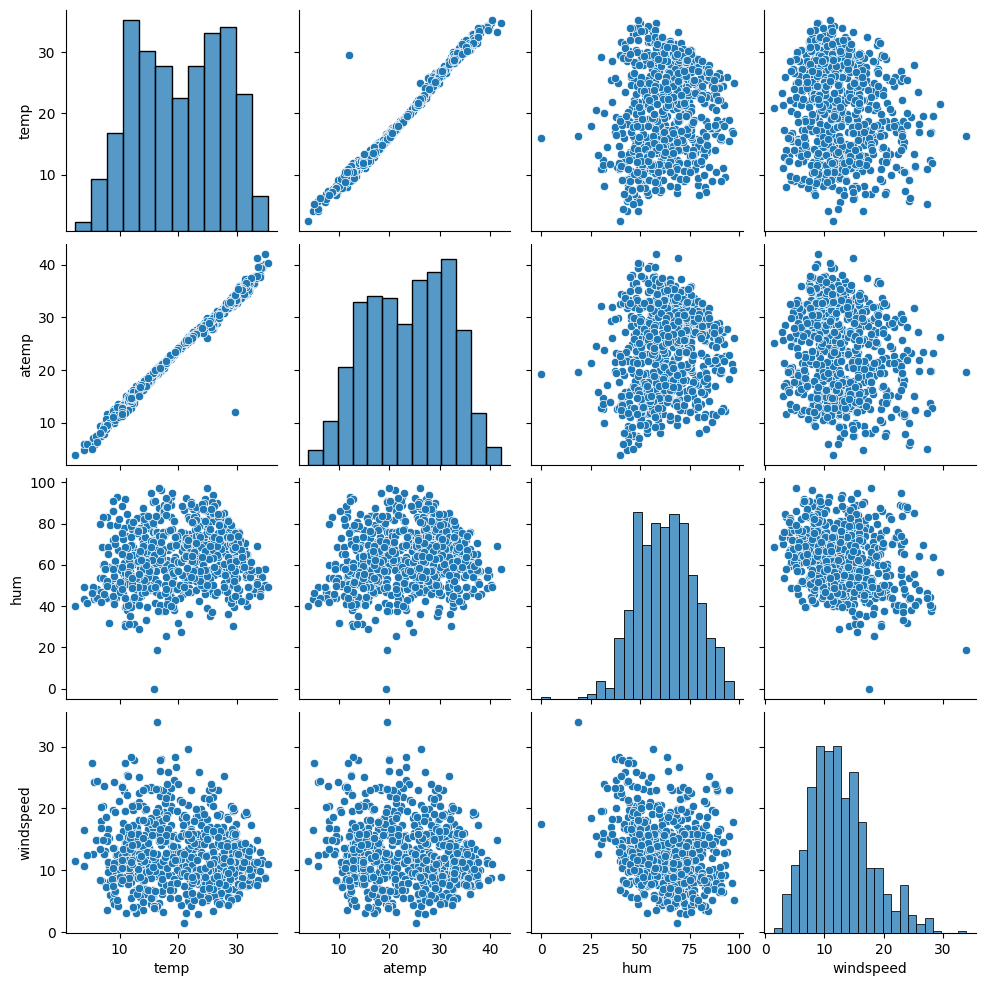

In [ ]:
sns.pairplot(bike_numeric)
plt.show()

In [ ]:
cor = bike_numeric.corr()
cor

,temp,atemp,hum,windspeed
temp,1.000000,0.991696,0.128565,-0.158186
atemp,0.991696,1.000000,0.141512,-0.183876
hum,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.158186,-0.183876,-0.248506,1.000000


<Axes: >

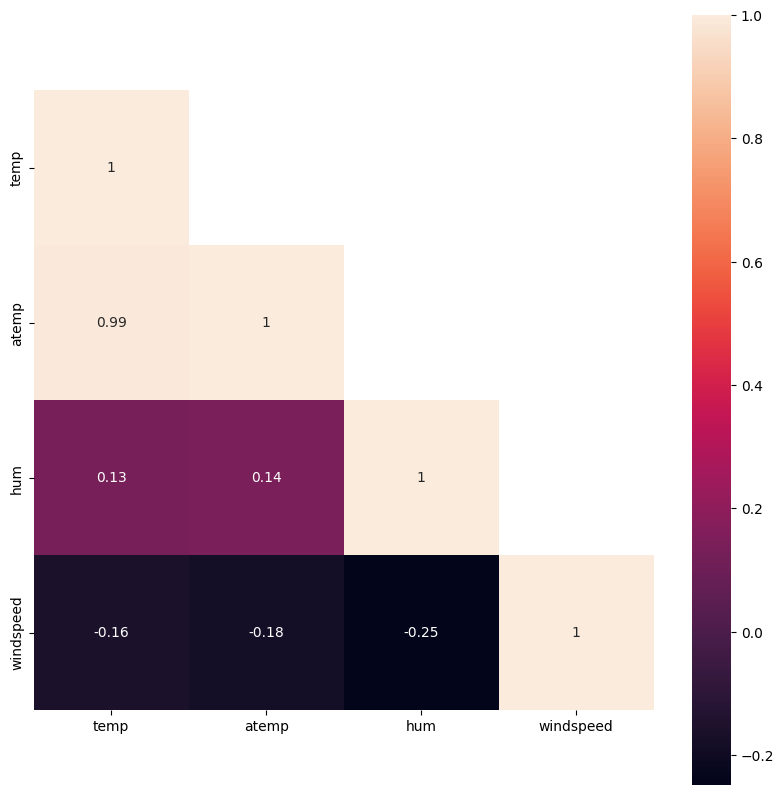

In [ ]:
#heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square = True, annot=True)


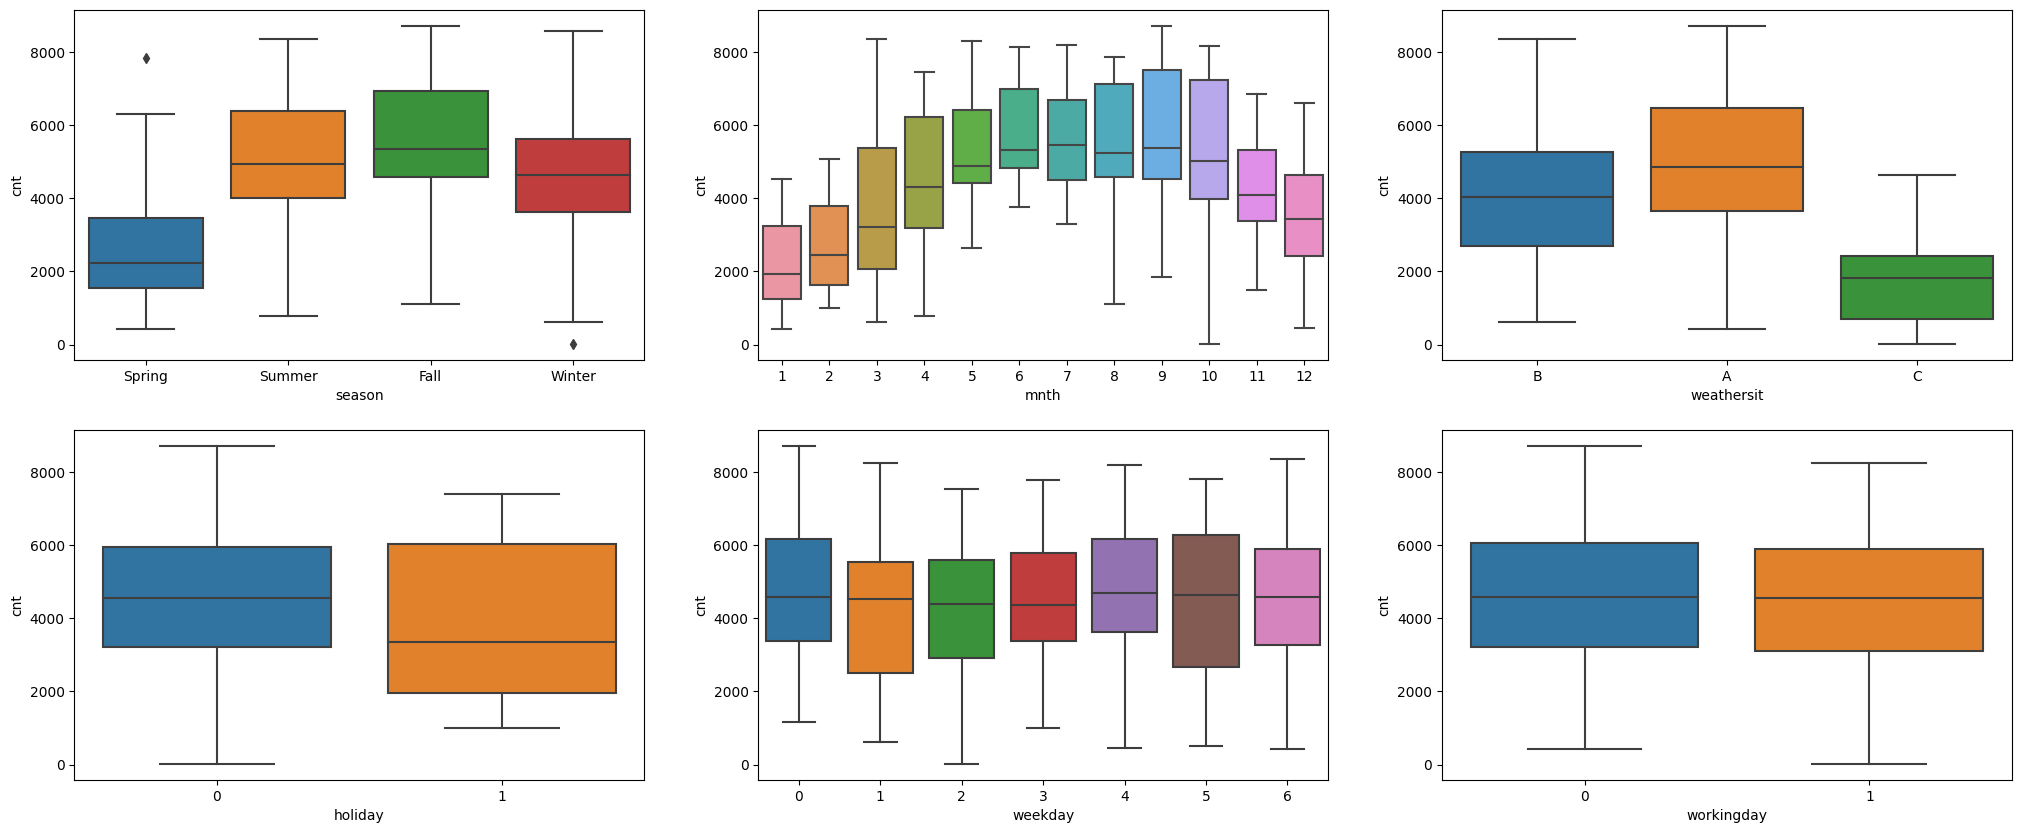

In [ ]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt'
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

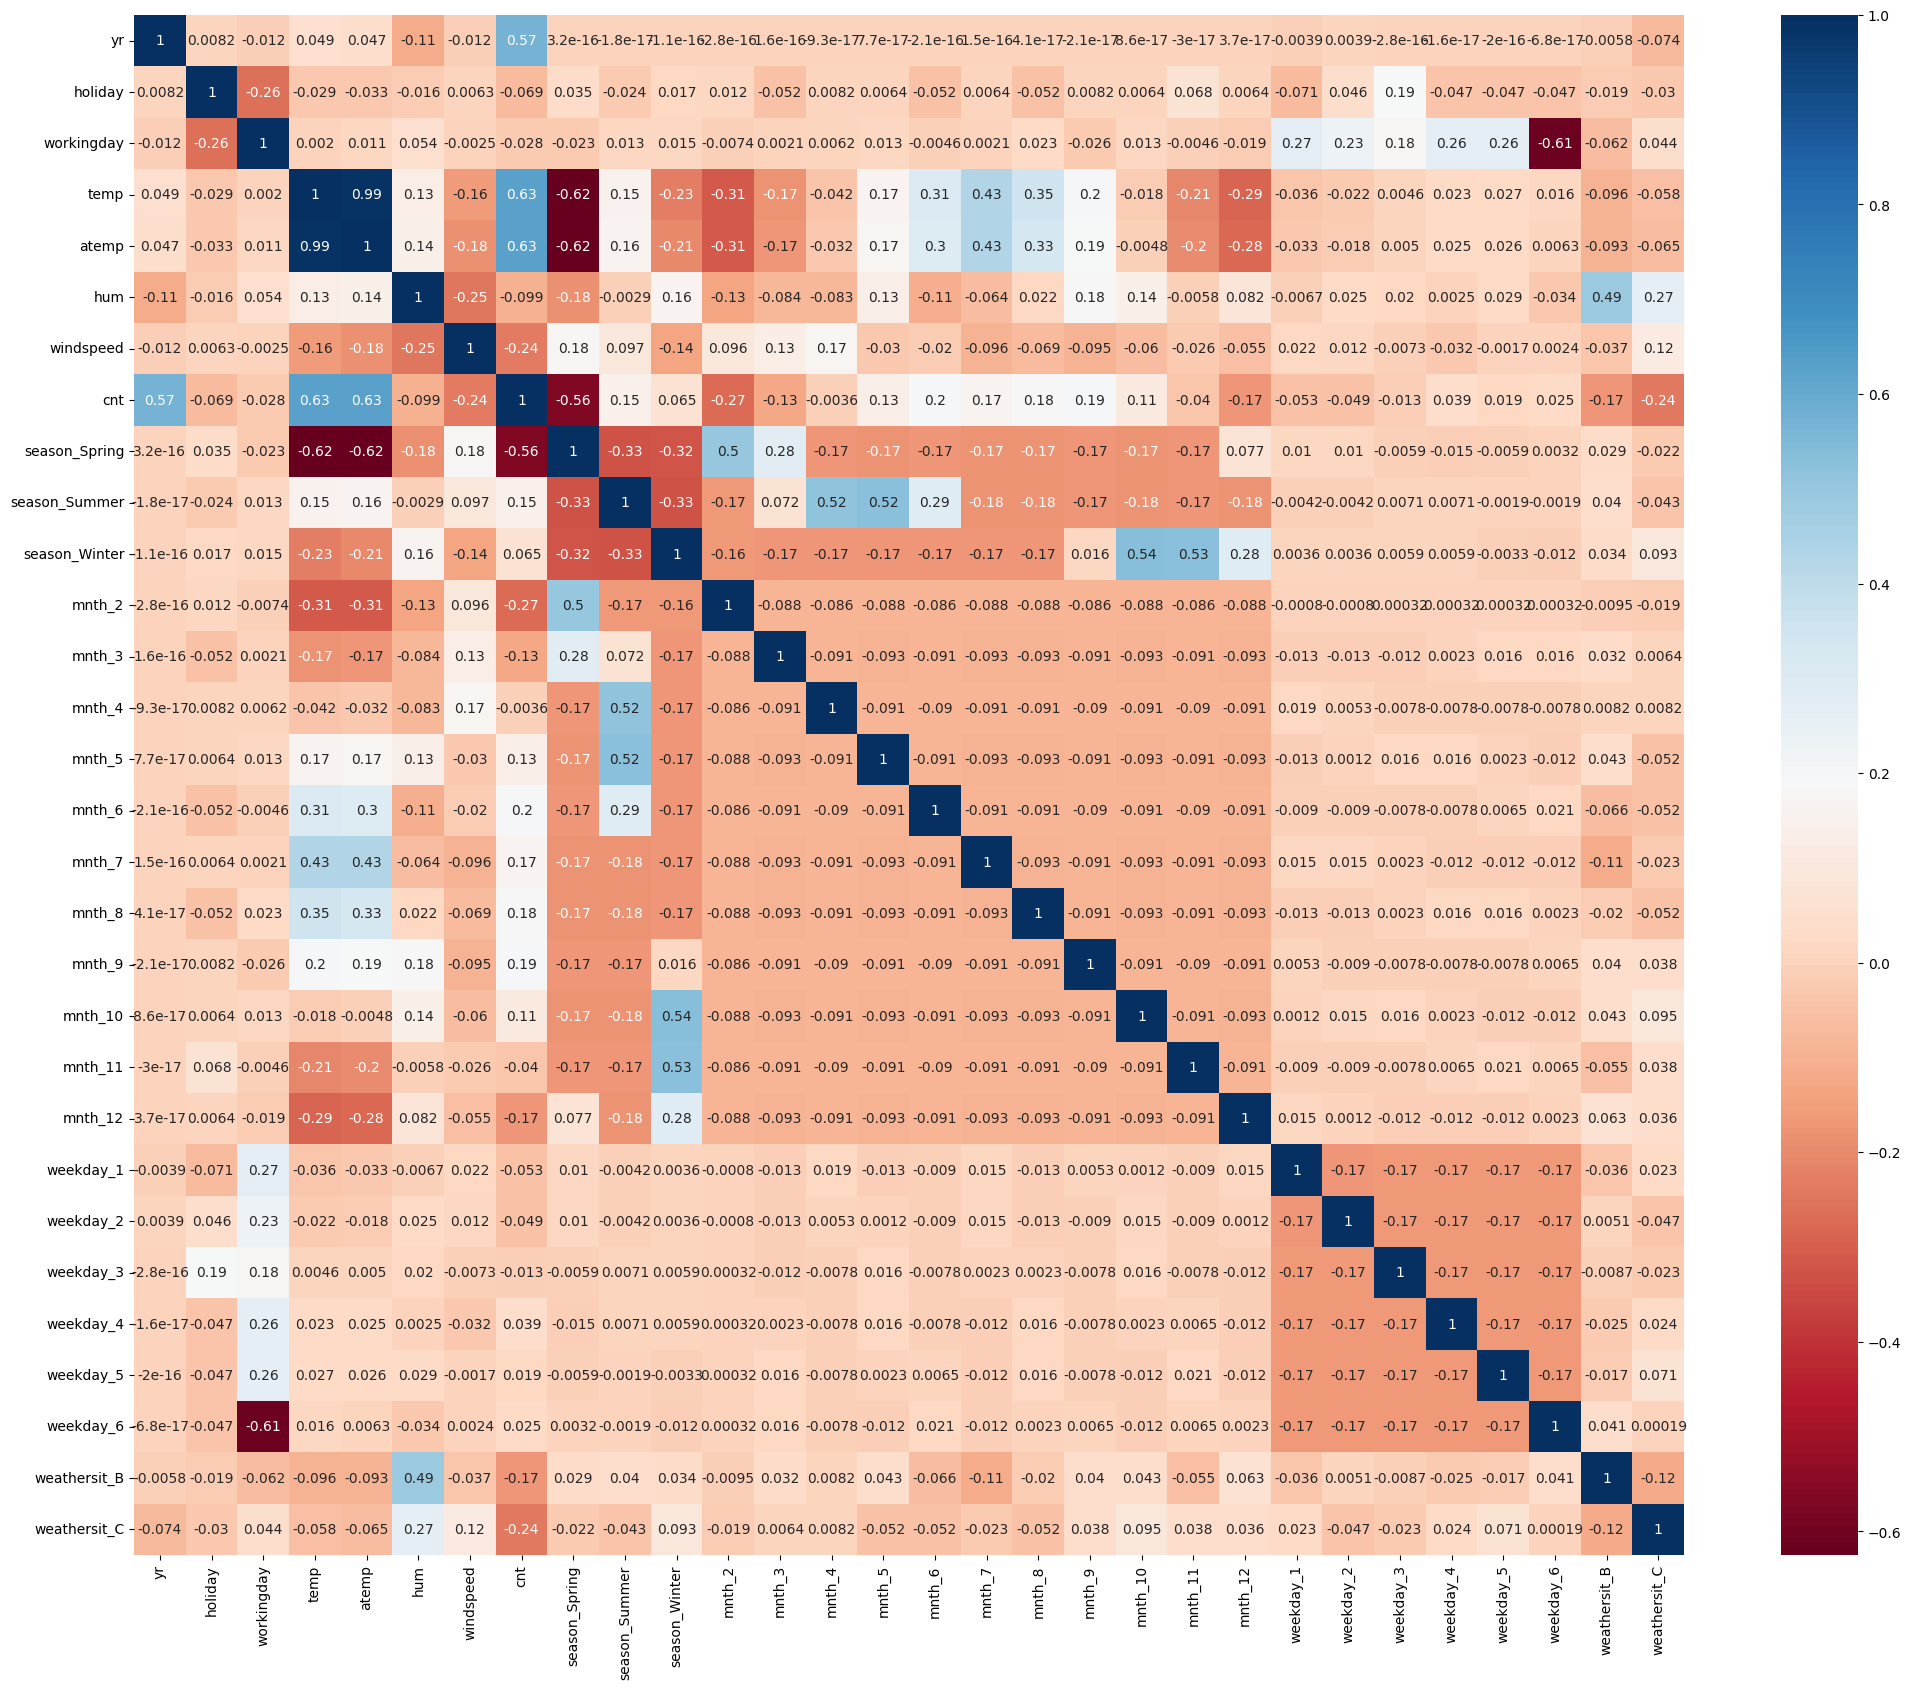

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

**3.Data Preparation**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_B,weathersit_C
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [ ]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_B,weathersit_C
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Model Building and Evaluation**

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 13),
 ('season_Winter', False, 5),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', False, 6),
 ('mnth_5', False, 4),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 12),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', False, 2),
 ('weekday_5', True, 1),
 ('weekday_6', False, 14),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring', 'mnth_3',
       'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_5',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_Summer', 'season_Winter', 'mnth_2',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12',
       'weekday_4', 'weekday_6'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

### VIF Check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,350.54
1,temp,340.53
3,hum,16.92
4,windspeed,4.94
13,weathersit_B,2.16
5,season_Spring,2.10
0,yr,1.98
10,weekday_2,1.37
12,weekday_5,1.37
9,weekday_1,1.36


In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [ ]:
# Check the parameters obtained

lr1.params

const            0.400260
yr               0.231304
temp             0.209864
atemp            0.190566
hum             -0.146001
windspeed       -0.169547
season_Spring   -0.149884
mnth_3           0.050338
mnth_9           0.089209
mnth_10          0.076807
weekday_1       -0.033316
weekday_2       -0.044189
weekday_3       -0.023013
weekday_5       -0.007283
weathersit_B    -0.050773
weathersit_C    -0.285014
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          3.97e-183
Time:                        09:16:47   Log-Likelihood:                 500.92
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     494   BIC:                            -902.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4003      0.031     13.099

## Model 2

In [ ]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,16.27
1,temp,9.90
3,windspeed,4.83
12,weathersit_B,2.15
4,season_Spring,2.10
0,yr,1.98
9,weekday_2,1.37
11,weekday_5,1.37
8,weekday_1,1.35
10,weekday_3,1.32


In [ ]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [ ]:
# Check the parameters obtained

lr2.params

const            0.404536
yr               0.231419
temp             0.384522
hum             -0.143110
windspeed       -0.176596
season_Spring   -0.150980
mnth_3           0.051256
mnth_9           0.088300
mnth_10          0.078042
weekday_1       -0.032489
weekday_2       -0.043386
weekday_3       -0.022649
weekday_5       -0.006435
weathersit_B    -0.051282
weathersit_C    -0.286709
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          7.54e-184
Time:                        09:17:01   Log-Likelihood:                 499.93
No. Observations:                 510   AIC:                            -969.9
Df Residuals:                     495   BIC:                            -906.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4045      0.030     13.295

## Model 3

In [ ]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.66
1,temp,4.55
0,yr,1.97
3,season_Spring,1.76
11,weathersit_B,1.49
10,weekday_5,1.35
8,weekday_2,1.33
7,weekday_1,1.29
9,weekday_3,1.29
4,mnth_3,1.20


In [ ]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [ ]:
lr3.params

const            0.317494
yr               0.234431
temp             0.371563
windspeed       -0.145089
season_Spring   -0.149108
mnth_3           0.057155
mnth_9           0.082585
mnth_10          0.073053
weekday_1       -0.036502
weekday_2       -0.046984
weekday_3       -0.025553
weekday_5       -0.008537
weathersit_B    -0.075224
weathersit_C    -0.328841
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          6.25e-182
Time:                        09:17:18   Log-Likelihood:                 492.62
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     496   BIC:                            -898.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3175      0.020     15.681

##  Model 4


In [ ]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF CHeck

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.66
1,temp,4.55
0,yr,1.97
3,season_Spring,1.76
11,weathersit_B,1.49
10,weekday_5,1.35
8,weekday_2,1.33
7,weekday_1,1.29
9,weekday_3,1.29
4,mnth_3,1.20


In [ ]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lr4.params

const            0.317494
yr               0.234431
temp             0.371563
windspeed       -0.145089
season_Spring   -0.149108
mnth_3           0.057155
mnth_9           0.082585
mnth_10          0.073053
weekday_1       -0.036502
weekday_2       -0.046984
weekday_3       -0.025553
weekday_5       -0.008537
weathersit_B    -0.075224
weathersit_C    -0.328841
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          6.25e-182
Time:                        09:21:32   Log-Likelihood:                 492.62
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     496   BIC:                            -898.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3175      0.020     15.681

## Model 5

In [ ]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

### VIF Check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.66
1,temp,4.52
0,yr,1.96
3,season_Spring,1.75
10,weathersit_B,1.46
9,weekday_5,1.35
7,weekday_2,1.33
6,weekday_1,1.29
8,weekday_3,1.28
4,mnth_3,1.20


In [ ]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained

lr5.params

const            0.342128
yr               0.233986
temp             0.354244
windspeed       -0.160657
season_Spring   -0.161963
mnth_3           0.053025
mnth_9           0.073438
weekday_1       -0.039389
weekday_2       -0.046160
weekday_3       -0.025592
weekday_5       -0.009652
weathersit_B    -0.072525
weathersit_C    -0.316216
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          1.70e-178
Time:                        09:21:44   Log-Likelihood:                 481.71
No. Observations:                 510   AIC:                            -937.4
Df Residuals:                     497   BIC:                            -882.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3421      0.020     17.153

## Model 6

In [ ]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)


### VIF Check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,windspeed,4.66
1,temp,4.52
0,yr,1.96
3,season_Spring,1.62
9,weathersit_B,1.46
8,weekday_5,1.35
6,weekday_2,1.33
5,weekday_1,1.29
7,weekday_3,1.28
4,mnth_9,1.15


In [ ]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Check the parameters obtained

lr6.params

const            0.343141
yr               0.234298
temp             0.354223
windspeed       -0.157945
season_Spring   -0.152827
mnth_9           0.071337
weekday_1       -0.041471
weekday_2       -0.046546
weekday_3       -0.026828
weekday_5       -0.010329
weathersit_B    -0.071228
weathersit_C    -0.310885
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          1.89e-177
Time:                        09:21:59   Log-Likelihood:                 476.46
No. Observations:                 510   AIC:                            -928.9
Df Residuals:                     498   BIC:                            -878.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3431      0.020     17.046

Text(0.5, 0, 'Errors')

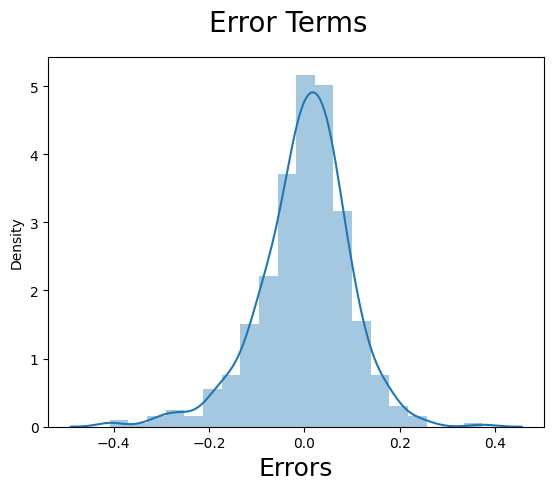

In [ ]:
y_train_pred = lr6.predict(X_train_lm6)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

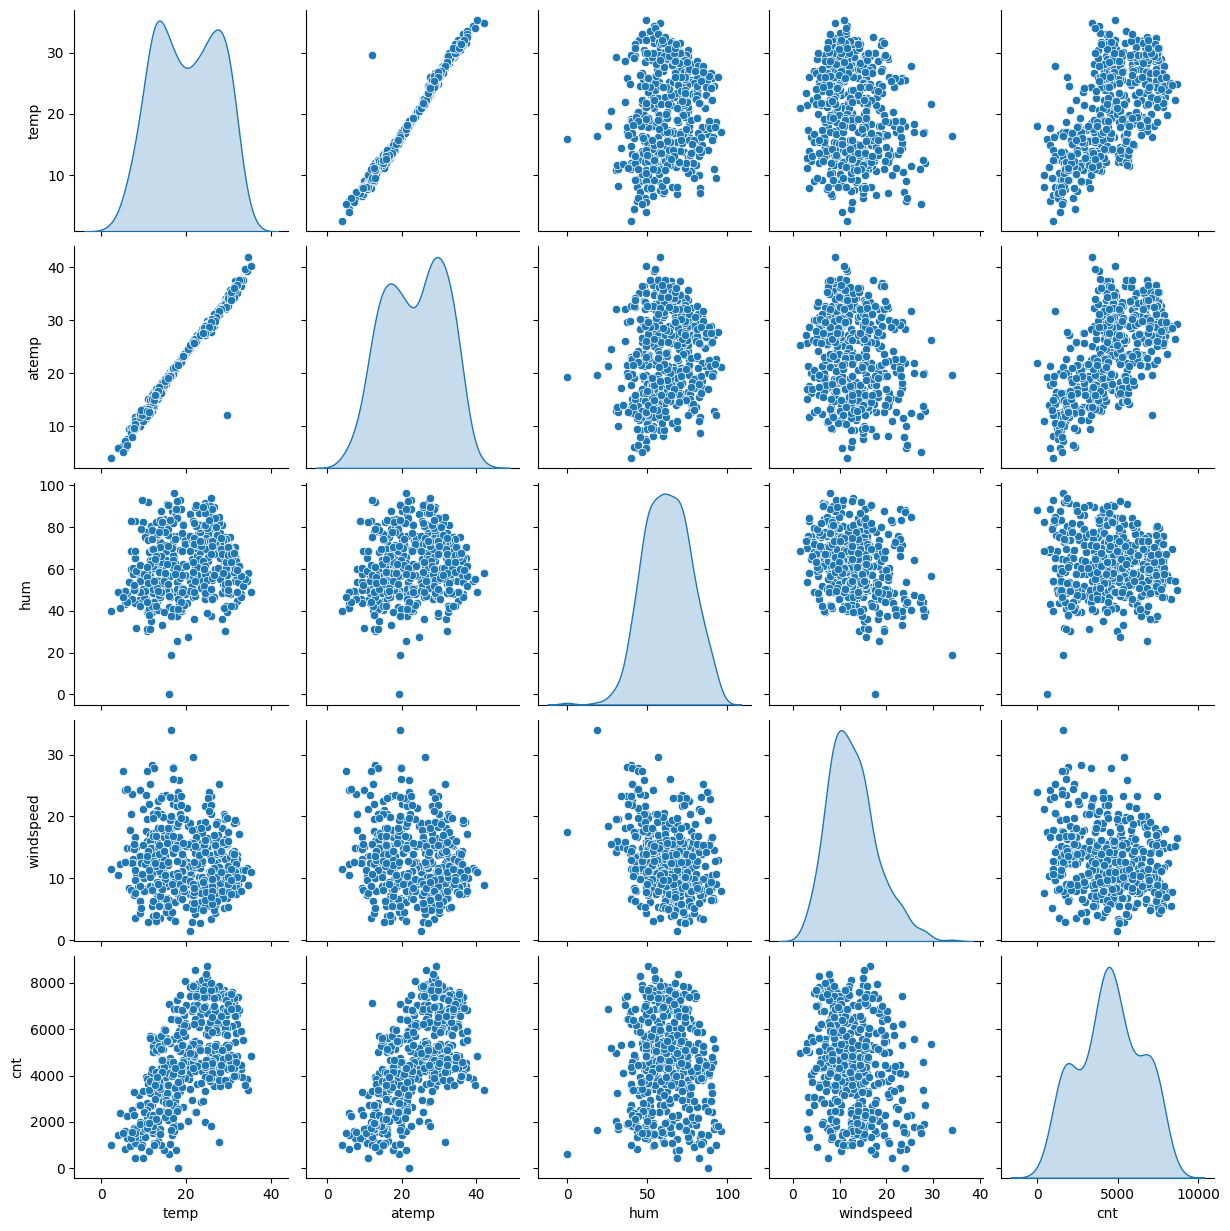

In [ ]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.66
1,temp,4.52
0,yr,1.96
3,season_Spring,1.62
9,weathersit_B,1.46
8,weekday_5,1.35
6,weekday_2,1.33
5,weekday_1,1.29
7,weekday_3,1.28
4,mnth_9,1.15


**MAKING PREDICTION USING FINAL MODEL**

In [ ]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform,
# as we want to use the metrics that the model learned from the training data to be applied on the test data.
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_B,weathersit_C
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   atemp          219 non-null    float64
 5   hum            219 non-null    float64
 6   windspeed      219 non-null    float64
 7   season_Spring  219 non-null    uint8  
 8   season_Summer  219 non-null    uint8  
 9   season_Winter  219 non-null    uint8  
 10  mnth_2         219 non-null    uint8  
 11  mnth_3         219 non-null    uint8  
 12  mnth_4         219 non-null    uint8  
 13  mnth_5         219 non-null    uint8  
 14  mnth_6         219 non-null    uint8  
 15  mnth_7         219 non-null    uint8  
 16  mnth_8         219 non-null    uint8  
 17  mnth_9         219 non-null    uint8  
 18  mnth_10  

In [ ]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_Spring  219 non-null    uint8  
 5   mnth_9         219 non-null    uint8  
 6   weekday_1      219 non-null    uint8  
 7   weekday_2      219 non-null    uint8  
 8   weekday_3      219 non-null    uint8  
 9   weekday_5      219 non-null    uint8  
 10  weathersit_B   219 non-null    uint8  
 11  weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [ ]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)


**MODEL EVALUATION**

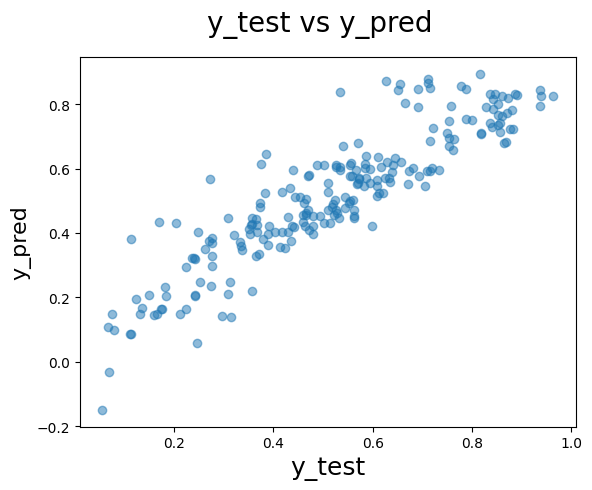

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8057479668738177

In [ ]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708


In [ ]:
# Get the shape of X_test
X_test.shape

(219, 11)

In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8107604346683267